# **Работа № 4**
1. Реализовать метод локальной аппроксимации, как он описан у проф. А.Ю. Лоскутова и продемонстрировать его применение к имеющимся рядам.
2. Сделать вывод о качестве прогноза и применимости к разного рода процессам.
3. Альтернативный вариант: тоже для метода максимального подобия им. И. А. Чучуевой

In [81]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Загрузка данных

In [82]:
# Берем волатильный актив (биткоин с тикером BTC) и абсолютно неволатильный актив (фиатная валюта USDT - цифровой доллар, курс которого стремится к цене бумажного доллара)
# Биржевые котировки берутся на равном промежутке времени и по отношению к доллару (USD)

symbols = ['BTC-USD', 'USDT-USD']
data = pd.DataFrame(yf.download(symbols, '2022-10-01', '2022-11-17', interval='1h'))
data = data['Close']
data

[*********************100%%**********************]  2 of 2 completed


,BTC-USD,USDT-USD
Datetime,,
2022-10-01 00:00:00+00:00,19400.000000,1.000052
2022-10-01 01:00:00+00:00,19425.039062,1.000051
2022-10-01 02:00:00+00:00,19422.853516,1.000062
2022-10-01 03:00:00+00:00,19412.548828,1.000038
2022-10-01 04:00:00+00:00,19404.400391,0.999988
...,...,...
2022-11-16 19:00:00+00:00,16554.962891,0.999194
2022-11-16 20:00:00+00:00,16580.814453,0.999221
2022-11-16 21:00:00+00:00,16551.392578,0.999201


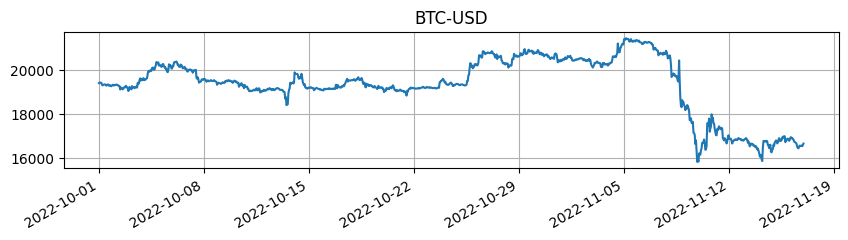

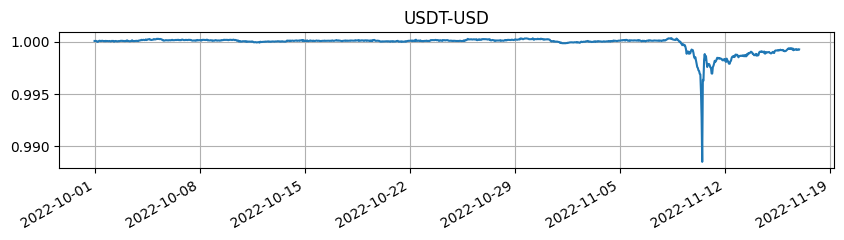

In [83]:
for i in symbols:
  plt.figure(figsize=(10,2))
  plt.title(i)
  plt.plot(data[i])
  plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
  plt.gcf().autofmt_xdate()
  plt.grid()
  plt.show();

In [84]:
def forecast(data: np.array, h: int, m: int) -> np.array:
    z0 = data[-m:]
    z = [data[i : i+m] for i in range(len(data) - (m + h + 1), 0, -1)]
    max_idx = len(data) - (m + h + 1) - np.argmax([np.cov(z0, x)[0, 1] / (np.std(x) * np.std(z0)) for x in z])
    zk = data[max_idx: max_idx + m].reshape(-1, 1)
    zk = np.hstack([zk, np.ones(m).reshape(-1, 1)])

    coef = np.matmul(np.matmul(zk.T, z0.reshape(-1, 1)).T, np.linalg.inv(np.matmul(zk.T, zk)))[0]

    return data[max_idx + m : max_idx + m + h] * coef[0] + coef[-1]

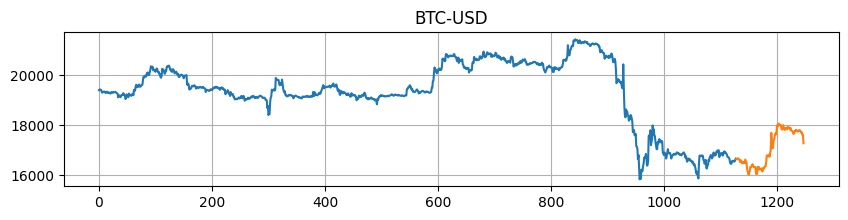

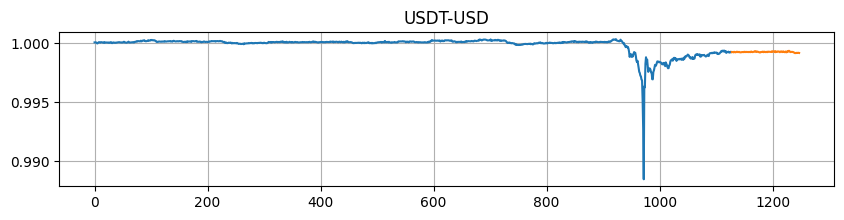

In [85]:
for i in symbols:
    data_pred = forecast(data[i].values.reshape(-1), h=120, m=13) # Делаем прогноз на 5 дней (24*5=120)
    plt.figure(figsize=(10,2))
    plt.title(i)
    plt.plot(np.arange(len(data[i].index)), data[i])
    plt.plot(np.arange(len(data_pred))+len(data[i]), data_pred)
    plt.grid()
    plt.show();